In [1]:
import findspark
findspark.init()
findspark.find()

import pyspark
from pyspark import SparkContext, SparkConf, SQLContext
from pyspark.sql import SparkSession

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[*]") \
    .appName("GenericAppName") \
    .getOrCreate()
sc=spark.sparkContext
sqlContext = SQLContext(sc)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/11/28 01:56:47 INFO org.apache.spark.SparkEnv: Registering MapOutputTracker
22/11/28 01:56:47 INFO org.apache.spark.SparkEnv: Registering BlockManagerMaster
22/11/28 01:56:47 INFO org.apache.spark.SparkEnv: Registering BlockManagerMasterHeartbeat
22/11/28 01:56:47 INFO org.apache.spark.SparkEnv: Registering OutputCommitCoordinator


# Task I

In [5]:
# Ingest data 2015-2022
from pyspark import SparkFiles

players_15 = spark.read.csv('gs://dataproc-staging-us-west1-682917987486-wdaku6r5/FIFA_DATA/players_15.csv',header=True, inferSchema = True)
players_16 = spark.read.csv('gs://dataproc-staging-us-west1-682917987486-wdaku6r5/FIFA_DATA/players_16.csv',header=True, inferSchema = True)
players_17 = spark.read.csv('gs://dataproc-staging-us-west1-682917987486-wdaku6r5/FIFA_DATA/players_17.csv',header=True, inferSchema = True)
players_18 = spark.read.csv('gs://dataproc-staging-us-west1-682917987486-wdaku6r5/FIFA_DATA/players_18.csv',header=True, inferSchema = True)
players_19 = spark.read.csv('gs://dataproc-staging-us-west1-682917987486-wdaku6r5/FIFA_DATA/players_19.csv',header=True, inferSchema = True)
players_20 = spark.read.csv('gs://dataproc-staging-us-west1-682917987486-wdaku6r5/FIFA_DATA/players_20.csv',header=True, inferSchema = True)
players_21 = spark.read.csv('gs://dataproc-staging-us-west1-682917987486-wdaku6r5/FIFA_DATA/players_21.csv',header=True, inferSchema = True)
players_22 = spark.read.csv('gs://dataproc-staging-us-west1-682917987486-wdaku6r5/FIFA_DATA/players_22.csv',header=True, inferSchema = True)


In [6]:
print(players_15.columns[55])

movement_agility


In [7]:
#Add new column for the year
from pyspark.sql.functions import lit

players_15 = players_15.withColumn('Year', lit(2015))
players_16 = players_16.withColumn('Year', lit(2016))
players_17 = players_17.withColumn('Year', lit(2017))
players_18 = players_18.withColumn('Year', lit(2018))
players_19 = players_19.withColumn('Year', lit(2019))
players_20 = players_20.withColumn('Year', lit(2020))
players_21 = players_21.withColumn('Year', lit(2021))
players_22 = players_22.withColumn('Year', lit(2022))


In [8]:
#Ensure every record can be uniquely identified
#combine fifa id and year as index
from pyspark.sql import functions as sf

players_15 = players_15.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_16 = players_16.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_17 = players_17.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_18 = players_18.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_19 = players_19.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_20 = players_20.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_21 = players_21.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_22 = players_22.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))

In [9]:
# union the data to one dataset
data = players_15.union(players_16)
data = data.union(players_17)
data = data.union(players_18)
data = data.union(players_19)
data = data.union(players_20)
data = data.union(players_21)
data = data.union(players_22)

In [13]:
# db_properties={}
# #update your db username
# db_properties['username']="postgres"
# #update your db password
# db_properties['password']="psql"
# #make sure you got the right port number here
# db_properties['url']= "jdbc:postgresql://localhost:5432/postgres"
# #make sure you had the Postgres JAR file in the right location
# db_properties['driver']="org.postgresql.Driver"
# db_properties['table']= "fifa.data"



# data.write.format("jdbc")\
# .mode("overwrite")\
# .option("url", db_properties['url'])\
# .option("dbtable", db_properties['table'])\
# .option("user", db_properties['username'])\
# .option("password", db_properties['password'])\
# .option("Driver", db_properties['driver'])\
# .save()


In [14]:
data.printSchema()

root
 |-- sofifa_id: integer (nullable = true)
 |-- player_url: string (nullable = true)
 |-- short_name: string (nullable = true)
 |-- long_name: string (nullable = true)
 |-- player_positions: string (nullable = true)
 |-- overall: integer (nullable = true)
 |-- potential: integer (nullable = true)
 |-- value_eur: double (nullable = true)
 |-- wage_eur: double (nullable = true)
 |-- age: integer (nullable = true)
 |-- dob: string (nullable = true)
 |-- height_cm: integer (nullable = true)
 |-- weight_kg: integer (nullable = true)
 |-- club_team_id: double (nullable = true)
 |-- club_name: string (nullable = true)
 |-- league_name: string (nullable = true)
 |-- league_level: integer (nullable = true)
 |-- club_position: string (nullable = true)
 |-- club_jersey_number: integer (nullable = true)
 |-- club_loaned_from: string (nullable = true)
 |-- club_joined: string (nullable = true)
 |-- club_contract_valid_until: integer (nullable = true)
 |-- nationality_id: integer (nullable = tru

In [15]:
# # read the data back from the postgres
# data_read = sqlContext.read.format("jdbc")\
#     .option("url", db_properties['url'])\
#     .option("dbtable", db_properties['table'])\
#     .option("user", db_properties['username'])\
#     .option("password", db_properties['password'])\
#     .option("Driver", db_properties['driver'])\
#     .load()

# data_read.show(1, vertical=True)

In [17]:
data_read = data

# Task II

In [19]:
#In order to find the club with highest numbers of players
#use where to find the data in 2022
#group the data by club name and sort them by the count of data
highest_number_club = data_read.where(data_read['Year']=='2022').groupBy("club_name").count().sort("count",ascending=False).limit(36).where(data_read['club_name']!='None').toPandas()
print("club with highest numbers:",highest_number_club['club_name'].values)

club with highest numbers: ['TSG Hoffenheim' 'Paris Saint-Germain' 'Newcastle United'
 'Crystal Palace' 'Arsenal' 'Burnley' 'RCD Espanyol de Barcelona'
 'RCD Mallorca' 'RC Celta de Vigo' 'Manchester United' 'Brentford'
 'Granada CF' 'Genoa' 'Real Madrid CF' 'ESTAC Troyes' 'FC Barcelona'
 'VfB Stuttgart' 'Villarreal CF' 'Real Betis Balompié' 'CA Osasuna'
 'Southampton' 'Leicester City' 'Venezia FC' 'Valencia CF'
 'Borussia Mönchengladbach' 'Tottenham Hotspur' 'Sevilla FC'
 'Wolverhampton Wanderers' 'Brighton & Hove Albion' 'Liverpool'
 'Norwich City' 'Olympique de Marseille' 'Chelsea' 'Everton'
 'West Ham United']


                    club_name  count
0                        None     61
1           Manchester United     33
2                   Brentford     33
3                     Arsenal     33
4                RCD Mallorca     33
5              Real Madrid CF     33
6                 Southampton     33
7            RC Celta de Vigo     33
8                  Venezia FC     33
9    Borussia Mönchengladbach     33
10     Brighton & Hove Albion     33
11                      Genoa     33
12        Paris Saint-Germain     33
13                  Liverpool     33
14                    Burnley     33
15               Norwich City     33
16                 Granada CF     33
17          Tottenham Hotspur     33
18           Newcastle United     33
19     Olympique de Marseille     33
20                 Sevilla FC     33
21    Wolverhampton Wanderers     33
22              VfB Stuttgart     33
23            West Ham United     33
24             Leicester City     33
25        Real Betis Balompié     33
2

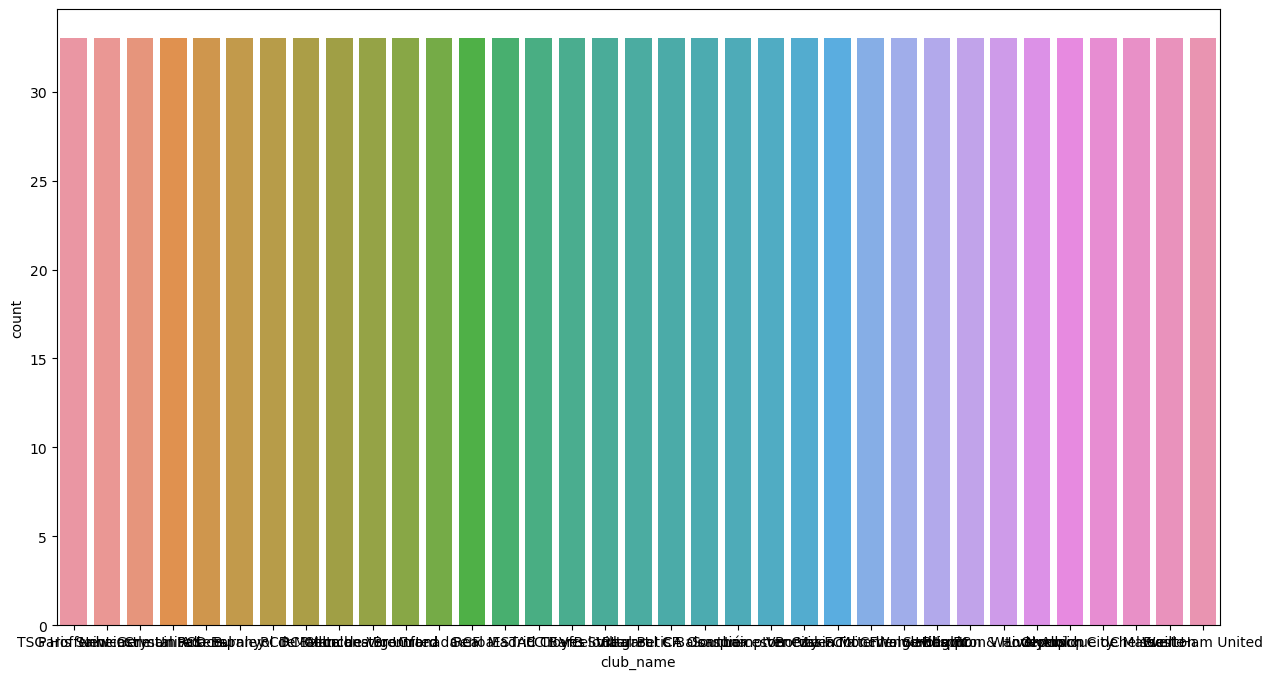

In [20]:
# this kernel shows the detailed number of players in each club and we can have the highest number from this.
# we drew the barplot of the count to give a direct interpretation
import seaborn as sns
from IPython import display
import matplotlib.pyplot as plt

top_50_highest_number_club = data_read.where(data_read['Year']=='2022').groupBy("club_name").count().sort("count",ascending=False).limit(50).toPandas()
print(top_50_highest_number_club)
plt.figure( figsize = ( 15, 8 ) )
sns.barplot( x="club_name", y="count", data=highest_number_club)
plt.show()

In [21]:
# the number of players older than 27 years oldfor each club
# we used where to find the players who are older than 27 and group the data by club_name, then we sort the data
# to find the club who has the highest number
# we sum the age for each club

import numpy as np
highest_number_over27_count = data_read.where(data_read['age']>27).groupBy("club_name").count().sort("count",ascending=False).toPandas()
highest_number_over27_sum = data_read.where(data_read['age']>27).groupBy("club_name").sum('age').toPandas()
# highest_number_over27_value = highest_number_over27['age'].values
# .sort("count",ascending=False).limit(50).toPandas()
print(highest_number_over27_count)
print(highest_number_over27_sum)
average_over27 = highest_number_over27_sum['sum(age)'].values/highest_number_over27_count['count'].values
print(type(average_over27),average_over27)

                   club_name  count
0                       None    874
1     İstanbul Başakşehir FK    133
2     Jeonbuk Hyundai Motors    118
3        FC Lokomotiv Moscow    108
4             Crystal Palace    106
...                      ...    ...
1007     Caracas Fútbol Club      3
1008          SC Freiburg II      2
1009            FC Helsingør      2
1010            FC Dordrecht      1
1011    Borussia Dortmund II      1

[1012 rows x 2 columns]
                        club_name  sum(age)
0                         Palermo      1105
1              Santiago Wanderers       749
2              1. FC Union Berlin      2215
3                           Carpi       554
4     Club Independiente Santa Fe      2119
...                           ...       ...
1007                     Gefle IF       614
1008                         Bury      1731
1009           Accrington Stanley      1020
1010                  Bohemian FC      1269
1011                         Como       219

[1012 rows x 2

In [22]:
# we calculated the average and found the highest average
highest_number_over27_avg = data_read.where(data_read['age']>27).groupBy("club_name").avg('age').sort("avg(age)",ascending=False).limit(5).toPandas()
print(highest_number_over27_avg)

               club_name   avg(age)
0            Yokohama FC  34.703704
1         Wexford Youths  34.000000
2     Zamora Fútbol Club  33.857143
3  Centro Atlético Fénix  33.600000
4         CF Fuenlabrada  33.545455


In [23]:
top1_highest_number_over27_avg = data_read.where(data_read['age']>27).groupBy("club_name").avg('age').sort("avg(age)",ascending=False).limit(1).where(data_read['club_name']!='None').toPandas()
print("club with highest numbers over 27:",top1_highest_number_over27_avg['club_name'].values)

club with highest numbers over 27: ['Yokohama FC']


In [24]:
# most frequent nation_positions for each year
# we also used where to filter the year, and group them by nation_position, count the number of each position and sort
# them to search the highest one.
most_frequent_nation_2015 = data_read.where(data_read['Year']==2015).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2015:",most_frequent_nation_2015['nation_position'].values)
most_frequent_nation_2016 = data_read.where(data_read['Year']==2016).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2016:",most_frequent_nation_2016['nation_position'].values)
most_frequent_nation_2017 = data_read.where(data_read['Year']==2017).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2017:",most_frequent_nation_2017['nation_position'].values)
most_frequent_nation_2018 = data_read.where(data_read['Year']==2018).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2018:",most_frequent_nation_2018['nation_position'].values)
most_frequent_nation_2019 = data_read.where(data_read['Year']==2019).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2019:",most_frequent_nation_2019['nation_position'].values)
most_frequent_nation_2020 = data_read.where(data_read['Year']==2020).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2020:",most_frequent_nation_2020['nation_position'].values)
most_frequent_nation_2021 = data_read.where(data_read['Year']==2021).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2021:",most_frequent_nation_2021['nation_position'].values)
most_frequent_nation_2022 = data_read.where(data_read['Year']==2022).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2022:",most_frequent_nation_2022['nation_position'].values)

Most frequent nation position 2015: ['SUB']
Most frequent nation position 2016: ['SUB']
Most frequent nation position 2017: ['SUB']
Most frequent nation position 2018: ['SUB']
Most frequent nation position 2019: ['SUB']
Most frequent nation position 2020: ['SUB']
Most frequent nation position 2021: ['SUB']
Most frequent nation position 2022: ['SUB']


In [25]:
# most_frequent_nation_2015 = data_read.where(data_read['Year']==2015).groupBy("nation_position").count().sort("count",ascending=False).limit(5).toPandas()
# print(most_frequent_nation_2015)

# Task III

## Data Engineering and cleaning

In [26]:
# Since we only use the skillsets of the players, we dropped all the unneccessary columns
drop_list = ['player_position',' nationality_name','work_rate','body_type','real_face','data_ID','short_name','long_name','dob','club_team_id','club_jersey_number',
                            'club_loaned_from','club_joined','club_contract_valid_until',
                            'nationality_id','nation_team_id','nation_position','nation_jersey_number',
                            'release_clause_eur','player_tags','player_traits','player_face_url',
                            'club_logo_url','club_flag_url','nation_logo_url','nation_flag_url',
                            'player_url','mentality_composure','goalkeeping_speed','club_position','league_level','league_name','club_name']

In [27]:
print(len(drop_list))

33


In [28]:
df_read = data_read.drop('player_positions','nationality_name','work_rate','body_type','real_face','data_ID','short_name','long_name','dob','club_team_id','club_jersey_number',
                            'club_loaned_from','club_joined','club_contract_valid_until',
                            'nationality_id','nation_team_id','nation_position','nation_jersey_number',
                            'release_clause_eur','player_tags','player_traits','player_face_url',
                            'club_logo_url','club_flag_url','nation_logo_url','nation_flag_url',
                            'player_url','mentality_composure','goalkeeping_speed','club_position','league_level','league_name','club_name')

In [29]:
print(len(data_read.columns))
print(len(df_read.columns))

112
79


In [30]:
df_read.printSchema()

root
 |-- sofifa_id: integer (nullable = true)
 |-- overall: integer (nullable = true)
 |-- potential: integer (nullable = true)
 |-- value_eur: double (nullable = true)
 |-- wage_eur: double (nullable = true)
 |-- age: integer (nullable = true)
 |-- height_cm: integer (nullable = true)
 |-- weight_kg: integer (nullable = true)
 |-- preferred_foot: string (nullable = true)
 |-- weak_foot: integer (nullable = true)
 |-- skill_moves: integer (nullable = true)
 |-- international_reputation: integer (nullable = true)
 |-- pace: integer (nullable = true)
 |-- shooting: integer (nullable = true)
 |-- passing: integer (nullable = true)
 |-- dribbling: integer (nullable = true)
 |-- defending: integer (nullable = true)
 |-- physic: integer (nullable = true)
 |-- attacking_crossing: integer (nullable = true)
 |-- attacking_finishing: integer (nullable = true)
 |-- attacking_heading_accuracy: integer (nullable = true)
 |-- attacking_short_passing: integer (nullable = true)
 |-- attacking_volleys

In [31]:

# from pyspark.sql.functions import *

# # Notice I dropped isPenalty and isSTPlay
# null_counts_plays_df = df_read.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) \
#                         for c in df_read.columns])

# null_counts_plays_df.show(truncate=False, vertical=True)

#### impute 'pace','shooting','passing','dribbling','defending','physic'

In [32]:
# we checked the missing values of the whole dataset and we found out that the columns with 
# larger amoungt of missing value: 'pace','shooting','passing','dribbling','defending','physic'
# Because there were many missing value in the data, we want to impute the missing value with the median value

In [33]:
from pyspark.ml.feature import Imputer
columns_to_be_imputed = ['pace']
value_not_in_dataset = -200

# Replace None/Missing Value with a value that can't be present in the dataset.
df_with_filled_na = df_read.fillna(-200, columns_to_be_imputed)

#Create new columns with imputed values. New columns will be suffixed with "_imputed"
imputer = Imputer (
            inputCols=columns_to_be_imputed,
            outputCols=["{}_imputed".format(c) for c in columns_to_be_imputed])\
            .setStrategy("median").setMissingValue(value_not_in_dataset)

df_imputed = imputer.fit(df_with_filled_na).transform(df_with_filled_na)
# we will drop the old column without imputation. We have only one column to be imputed
df_imputed_enhanced = df_imputed.drop(columns_to_be_imputed[0])

# We will rename our newly imputed column with the correct name
df_fully_imputed = df_imputed_enhanced.withColumnRenamed("pace_imputed","pace")

In [34]:
from pyspark.ml.feature import Imputer
columns_to_be_imputed = ['shooting']
value_not_in_dataset = -200

# Replace None/Missing Value with a value that can't be present in the dataset.
df_with_filled_na2 = df_fully_imputed.fillna(-200, columns_to_be_imputed)

#Create new columns with imputed values. New columns will be suffixed with "_imputed"
imputer = Imputer (
            inputCols=columns_to_be_imputed,
            outputCols=["{}_imputed".format(c) for c in columns_to_be_imputed])\
            .setStrategy("median").setMissingValue(value_not_in_dataset)

df_imputed2 = imputer.fit(df_with_filled_na2).transform(df_with_filled_na2)
# we will drop the old column without imputation. We have only one column to be imputed
df_imputed_enhanced2 = df_imputed2.drop(columns_to_be_imputed[0])

# We will rename our newly imputed column with the correct name
df_fully_imputed2 = df_imputed_enhanced2.withColumnRenamed("shooting_imputed","shooting")

In [35]:
from pyspark.ml.feature import Imputer
columns_to_be_imputed = ['passing']
value_not_in_dataset = -200

# Replace None/Missing Value with a value that can't be present in the dataset.
df_with_filled_na3 = df_fully_imputed2.fillna(-200, columns_to_be_imputed)

#Create new columns with imputed values. New columns will be suffixed with "_imputed"
imputer = Imputer (
            inputCols=columns_to_be_imputed,
            outputCols=["{}_imputed".format(c) for c in columns_to_be_imputed])\
            .setStrategy("median").setMissingValue(value_not_in_dataset)

df_imputed3 = imputer.fit(df_with_filled_na3).transform(df_with_filled_na3)
# we will drop the old column without imputation. We have only one column to be imputed
df_imputed_enhanced3 = df_imputed3.drop(columns_to_be_imputed[0])

# We will rename our newly imputed column with the correct name
df_fully_imputed3 = df_imputed_enhanced3.withColumnRenamed("passing_imputed","passing")

In [36]:
from pyspark.ml.feature import Imputer
columns_to_be_imputed = ['dribbling']
value_not_in_dataset = -200

# Replace None/Missing Value with a value that can't be present in the dataset.
df_with_filled_na4 = df_fully_imputed3.fillna(-200, columns_to_be_imputed)

#Create new columns with imputed values. New columns will be suffixed with "_imputed"
imputer = Imputer (
            inputCols=columns_to_be_imputed,
            outputCols=["{}_imputed".format(c) for c in columns_to_be_imputed])\
            .setStrategy("median").setMissingValue(value_not_in_dataset)

df_imputed4 = imputer.fit(df_with_filled_na4).transform(df_with_filled_na4)
# we will drop the old column without imputation. We have only one column to be imputed
df_imputed_enhanced4 = df_imputed4.drop(columns_to_be_imputed[0])

# We will rename our newly imputed column with the correct name
df_fully_imputed4 = df_imputed_enhanced4.withColumnRenamed("dribbling_imputed","dribbling")

In [37]:
from pyspark.ml.feature import Imputer
columns_to_be_imputed = ['defending']
value_not_in_dataset = -200

# Replace None/Missing Value with a value that can't be present in the dataset.
df_with_filled_na5 = df_fully_imputed4.fillna(-200, columns_to_be_imputed)

#Create new columns with imputed values. New columns will be suffixed with "_imputed"
imputer = Imputer (
            inputCols=columns_to_be_imputed,
            outputCols=["{}_imputed".format(c) for c in columns_to_be_imputed])\
            .setStrategy("median").setMissingValue(value_not_in_dataset)

df_imputed5 = imputer.fit(df_with_filled_na5).transform(df_with_filled_na5)
# we will drop the old column without imputation. We have only one column to be imputed
df_imputed_enhanced5 = df_imputed5.drop(columns_to_be_imputed[0])

# We will rename our newly imputed column with the correct name
df_fully_imputed5 = df_imputed_enhanced5.withColumnRenamed("defending_imputed","defending")

In [38]:
from pyspark.ml.feature import Imputer
columns_to_be_imputed = ['physic']
value_not_in_dataset = -200

# Replace None/Missing Value with a value that can't be present in the dataset.
df_with_filled_na6 = df_fully_imputed5.fillna(-200, columns_to_be_imputed)

#Create new columns with imputed values. New columns will be suffixed with "_imputed"
imputer = Imputer (
            inputCols=columns_to_be_imputed,
            outputCols=["{}_imputed".format(c) for c in columns_to_be_imputed])\
            .setStrategy("median").setMissingValue(value_not_in_dataset)

df_imputed6 = imputer.fit(df_with_filled_na6).transform(df_with_filled_na6)
# we will drop the old column without imputation. We have only one column to be imputed
df_imputed_enhanced6 = df_imputed6.drop(columns_to_be_imputed[0])

# We will rename our newly imputed column with the correct name
df_fully_imputed6 = df_imputed_enhanced6.withColumnRenamed("physic_imputed","physic")

In [39]:
from pyspark.sql.functions import *

# # Notice I dropped isPenalty and isSTPlay
# null_counts_plays_df = df_fully_imputed6.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) \
#                         for c in df_read.columns])

# null_counts_plays_df.show(truncate=False, vertical=True)

#### drop null

In [40]:
# we chaecked the missing value again and found out the rows with missing value
# Then we drop the rows
# Reason: The number of row was small compared to the entire dataset, so we just drop them 

In [41]:
df_read = df_fully_imputed6.dropna()

In [42]:
null_counts_plays_df = df_read.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) \
                        for c in df_read.columns])

null_counts_plays_df.show(truncate=False, vertical=True)

-RECORD 0--------------------------
 sofifa_id                   | 0   
 overall                     | 0   
 potential                   | 0   
 value_eur                   | 0   
 wage_eur                    | 0   
 age                         | 0   
 height_cm                   | 0   
 weight_kg                   | 0   
 preferred_foot              | 0   
 weak_foot                   | 0   
 skill_moves                 | 0   
 international_reputation    | 0   
 attacking_crossing          | 0   
 attacking_finishing         | 0   
 attacking_heading_accuracy  | 0   
 attacking_short_passing     | 0   
 attacking_volleys           | 0   
 skill_dribbling             | 0   
 skill_curve                 | 0   
 skill_fk_accuracy           | 0   
 skill_long_passing          | 0   
 skill_ball_control          | 0   
 movement_acceleration       | 0   
 movement_sprint_speed       | 0   
 movement_agility            | 0   
 movement_reactions          | 0   
 movement_balance           

## Data preprocessing

#### label to binary

In [43]:
# Because there are only two values in the 'preferred_foot' column, we convert the value to 0 and 1
label_to_binary = udf(lambda name: 0.0 if name == 'Left' else 1.0)
df_read_bi = df_read.withColumn('preferred_foot', label_to_binary(col('preferred_foot')))

In [44]:
# df_read_bi.show(vertical = True)

#### string to int

In [45]:
# We found the format "XX+X" in some columns and we calculated them and converted them to int
def addall(string):
    if len(string)== 4:
        string = int(string[0:2])+int(string[-1])
    elif len(string) ==2:
        string = int(string)
    elif len(string)== 6:
        string = int(string[-2:])
    return string

In [46]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

In [47]:
addallUDF = udf(lambda i:addall(i), IntegerType())

In [48]:
str_to_int_list = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb',
                   'ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk']

In [49]:
df_read_int = df_read_bi.withColumn('ls', addallUDF(col('ls')))
df_read_int = df_read_int.withColumn('st', addallUDF(col('st')))
df_read_int = df_read_int.withColumn('rs', addallUDF(col('rs')))
df_read_int = df_read_int.withColumn('lw', addallUDF(col('lw')))
df_read_int = df_read_int.withColumn('lf', addallUDF(col('lf')))
df_read_int = df_read_int.withColumn('cf', addallUDF(col('cf')))
df_read_int = df_read_int.withColumn('rf', addallUDF(col('rf')))
df_read_int = df_read_int.withColumn('rw', addallUDF(col('rw')))
df_read_int = df_read_int.withColumn('lam', addallUDF(col('lam')))
df_read_int = df_read_int.withColumn('cam', addallUDF(col('cam')))
df_read_int = df_read_int.withColumn('ram', addallUDF(col('ram')))
df_read_int = df_read_int.withColumn('lm', addallUDF(col('lm')))
df_read_int = df_read_int.withColumn('lcm', addallUDF(col('lcm')))
df_read_int = df_read_int.withColumn('cm', addallUDF(col('cm')))
df_read_int = df_read_int.withColumn('rcm', addallUDF(col('rcm')))
df_read_int = df_read_int.withColumn('rm', addallUDF(col('rm')))
df_read_int = df_read_int.withColumn('lwb', addallUDF(col('lwb')))
df_read_int = df_read_int.withColumn('ldm', addallUDF(col('ldm')))
df_read_int = df_read_int.withColumn('cdm', addallUDF(col('cdm')))
df_read_int = df_read_int.withColumn('rdm', addallUDF(col('rdm')))
df_read_int = df_read_int.withColumn('rwb', addallUDF(col('rwb')))
df_read_int = df_read_int.withColumn('lb', addallUDF(col('lb')))
df_read_int = df_read_int.withColumn('lcb', addallUDF(col('lcb')))
df_read_int = df_read_int.withColumn('cb', addallUDF(col('cb')))
df_read_int = df_read_int.withColumn('rcb', addallUDF(col('rcb')))
df_read_int = df_read_int.withColumn('rb', addallUDF(col('rb')))
df_read_int = df_read_int.withColumn('gk', addallUDF(col('gk')))

#### cast data type

In [50]:
print(df_read_int.columns)

['sofifa_id', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'l

In [51]:
# we changed the type of data to DoubleType

In [52]:
from pyspark.sql.types import DoubleType
for i in df_read_int.columns:
    df_read_int = df_read_int.withColumn(i, df_read_int[i].cast(DoubleType()))

In [53]:
df_read_int.printSchema()

root
 |-- sofifa_id: double (nullable = true)
 |-- overall: double (nullable = true)
 |-- potential: double (nullable = true)
 |-- value_eur: double (nullable = true)
 |-- wage_eur: double (nullable = true)
 |-- age: double (nullable = true)
 |-- height_cm: double (nullable = true)
 |-- weight_kg: double (nullable = true)
 |-- preferred_foot: double (nullable = true)
 |-- weak_foot: double (nullable = true)
 |-- skill_moves: double (nullable = true)
 |-- international_reputation: double (nullable = true)
 |-- attacking_crossing: double (nullable = true)
 |-- attacking_finishing: double (nullable = true)
 |-- attacking_heading_accuracy: double (nullable = true)
 |-- attacking_short_passing: double (nullable = true)
 |-- attacking_volleys: double (nullable = true)
 |-- skill_dribbling: double (nullable = true)
 |-- skill_curve: double (nullable = true)
 |-- skill_fk_accuracy: double (nullable = true)
 |-- skill_long_passing: double (nullable = true)
 |-- skill_ball_control: double (nulla

In [54]:
df_read_features = df_read_int.withColumn('overall_new',col('overall')).drop('overall')

In [55]:
df_read_int.show(5,vertical = True)

-RECORD 0-------------------------------
 sofifa_id                   | 158023.0 
 overall                     | 93.0     
 potential                   | 95.0     
 value_eur                   | 1.005E8  
 wage_eur                    | 550000.0 
 age                         | 27.0     
 height_cm                   | 169.0    
 weight_kg                   | 67.0     
 preferred_foot              | 0.0      
 weak_foot                   | 3.0      
 skill_moves                 | 4.0      
 international_reputation    | 5.0      
 attacking_crossing          | 84.0     
 attacking_finishing         | 94.0     
 attacking_heading_accuracy  | 71.0     
 attacking_short_passing     | 89.0     
 attacking_volleys           | 85.0     
 skill_dribbling             | 96.0     
 skill_curve                 | 89.0     
 skill_fk_accuracy           | 90.0     
 skill_long_passing          | 76.0     
 skill_ball_control          | 96.0     
 movement_acceleration       | 96.0     
 movement_sprint

In [56]:
feature_cols = df_read_int.columns
del feature_cols[2]

In [57]:
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors

In [58]:
len(df_read_features.columns)

79

In [59]:

null_counts_plays_df_2 = df_read_features.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) \
                        for c in df_read_features.columns])

null_counts_plays_df_2.show(truncate=False, vertical=True)

-RECORD 0--------------------------
 sofifa_id                   | 0   
 potential                   | 0   
 value_eur                   | 0   
 wage_eur                    | 0   
 age                         | 0   
 height_cm                   | 0   
 weight_kg                   | 0   
 preferred_foot              | 0   
 weak_foot                   | 0   
 skill_moves                 | 0   
 international_reputation    | 0   
 attacking_crossing          | 0   
 attacking_finishing         | 0   
 attacking_heading_accuracy  | 0   
 attacking_short_passing     | 0   
 attacking_volleys           | 0   
 skill_dribbling             | 0   
 skill_curve                 | 0   
 skill_fk_accuracy           | 0   
 skill_long_passing          | 0   
 skill_ball_control          | 0   
 movement_acceleration       | 0   
 movement_sprint_speed       | 0   
 movement_agility            | 0   
 movement_reactions          | 0   
 movement_balance            | 0   
 power_shot_power           

In [60]:
df_read_features = df_read_features.dropna()

In [61]:
# we checked the data again to ensure there is no missing value in the dataset
null_counts_plays_df_2 = df_read_features.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) \
                        for c in df_read_features.columns])

null_counts_plays_df_2.show(truncate=False, vertical=True)

-RECORD 0--------------------------
 sofifa_id                   | 0   
 potential                   | 0   
 value_eur                   | 0   
 wage_eur                    | 0   
 age                         | 0   
 height_cm                   | 0   
 weight_kg                   | 0   
 preferred_foot              | 0   
 weak_foot                   | 0   
 skill_moves                 | 0   
 international_reputation    | 0   
 attacking_crossing          | 0   
 attacking_finishing         | 0   
 attacking_heading_accuracy  | 0   
 attacking_short_passing     | 0   
 attacking_volleys           | 0   
 skill_dribbling             | 0   
 skill_curve                 | 0   
 skill_fk_accuracy           | 0   
 skill_long_passing          | 0   
 skill_ball_control          | 0   
 movement_acceleration       | 0   
 movement_sprint_speed       | 0   
 movement_agility            | 0   
 movement_reactions          | 0   
 movement_balance            | 0   
 power_shot_power           

In [62]:
# we assembled the features in the data to a vector so that it can be recognized by pyspark models

In [63]:
def transData(data):
    return data.rdd.map(lambda r: [r[-1], Vectors.dense(r[:-1])]).\
           toDF(['output','features'])

data= transData(df_read_features)
data.show()

+------+--------------------+
|output|            features|
+------+--------------------+
|  93.0|[158023.0,95.0,1....|
|  92.0|[20801.0,92.0,7.9...|
|  90.0|[9014.0,90.0,5.45...|
|  90.0|[41236.0,90.0,5.2...|
|  90.0|[167495.0,90.0,6....|
|  89.0|[41.0,89.0,3.6E7,...|
|  89.0|[176580.0,91.0,4....|
|  88.0|[7826.0,88.0,4.05...|
|  88.0|[121944.0,88.0,3....|
|  88.0|[156616.0,88.0,3....|
|  88.0|[167397.0,88.0,4....|
|  88.0|[183277.0,90.0,4....|
|  87.0|[121939.0,87.0,2....|
|  87.0|[155862.0,87.0,3....|
|  87.0|[164240.0,87.0,2....|
|  87.0|[168542.0,87.0,3....|
|  87.0|[173731.0,91.0,3....|
|  87.0|[177003.0,87.0,3....|
|  87.0|[188545.0,89.0,4....|
|  86.0|[10535.0,86.0,1.5...|
+------+--------------------+
only showing top 20 rows



In [64]:
# we normalized the features by using StandardScaler

In [65]:
from pyspark.ml.feature import StandardScaler
Scalerizer=StandardScaler().setInputCol("features").setOutputCol("norm_features")
data_norm = Scalerizer.fit(data).transform(data)

In [66]:
data_norm = data_norm.drop('features')
data_norm = data_norm.withColumn('features',col('norm_features')).drop('norm_features')

In [67]:
# data_norm.select('features').show(vertical = False)

In [68]:
# (trainingData, testData) = data_norm.randomSplit([0.8, 0.2])

# then we splited the data in to training and test dataset

(trainingData, testData) = data_norm.randomSplit([0.8, 0.2])

In [69]:
trainingData.describe().show()

+-------+------------------+
|summary|            output|
+-------+------------------+
|  count|            111785|
|   mean| 65.69243637339535|
| stddev|7.0706646380189575|
|    min|              40.0|
|    max|              94.0|
+-------+------------------+



In [70]:
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 111785


Test Dataset Count: 27945


# Pyspark

## Random Forest

In [71]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

rf2 = RandomForestRegressor(featuresCol = 'features', labelCol = 'output',numTrees=200, maxDepth=5)

# Train model.  This also runs the indexer.
model2 = rf2.fit(trainingData)

# Make predictions.
predictions2 = model2.transform(testData)

predictions2.show(5)

22/11/28 02:13:47 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1019.2 KiB
22/11/28 02:13:55 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1335.4 KiB
22/11/28 02:14:04 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1965.2 KiB


+------+--------------------+-----------------+
|output|            features|       prediction|
+------+--------------------+-----------------+
|  66.0|[0.03820530001504...| 65.3606553081347|
|  66.0|[0.28265544798691...|63.70789157823709|
|  66.0|[0.53014926553508...|66.19326396716272|
|  66.0|[1.32477892358710...|64.28787842304088|
|  66.0|[1.39127585699721...|63.21658468402371|
+------+--------------------+-----------------+
only showing top 5 rows



In [72]:
evaluator2 = RegressionEvaluator(
    labelCol="output", predictionCol="prediction", metricName="rmse")
rmse2 = evaluator2.evaluate(predictions2)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse2)

Root Mean Squared Error (RMSE) on test data = 1.57648


### tune the parameters

In [73]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

rf3 = RandomForestRegressor(featuresCol = 'features', labelCol = 'output',numTrees=100, maxDepth=5)

# Train model.  This also runs the indexer.
model3 = rf3.fit(trainingData)

# Make predictions.
predictions3 = model3.transform(testData)

predictions3.show(5)

evaluator3 = RegressionEvaluator(
    labelCol="output", predictionCol="prediction", metricName="rmse")
rmse3 = evaluator3.evaluate(predictions3)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse3)

22/11/28 02:15:25 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1039.5 KiB
22/11/28 02:15:29 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1355.2 KiB


+------+--------------------+-----------------+
|output|            features|       prediction|
+------+--------------------+-----------------+
|  66.0|[0.03820530001504...| 65.3365914506145|
|  66.0|[0.28265544798691...|63.42295529085955|
|  66.0|[0.53014926553508...|65.97380092447919|
|  66.0|[1.32477892358710...|64.60472831199418|
|  66.0|[1.39127585699721...|63.26268016348623|
+------+--------------------+-----------------+
only showing top 5 rows



Root Mean Squared Error (RMSE) on test data = 1.56785


In [74]:
trainingData.show(5)

+------+--------------------+
|output|            features|
+------+--------------------+
|  66.0|[0.06238073264976...|
|  66.0|[0.09244059313201...|
|  66.0|[0.23534812657222...|
|  66.0|[0.45799980291182...|
|  66.0|[0.52388800240667...|
+------+--------------------+
only showing top 5 rows



In [75]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

rf_1 = RandomForestRegressor(featuresCol = 'features', labelCol = 'output',numTrees=100, maxDepth=6)

# Train model.  This also runs the indexer.
model_1 = rf_1.fit(trainingData)

# Make predictions.
predictions_1 = model_1.transform(testData)

predictions_1.show(5)

evaluator_1 = RegressionEvaluator(
    labelCol="output", predictionCol="prediction", metricName="rmse")
rmse_1 = evaluator_1.evaluate(predictions_1)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse_1)

22/11/28 02:16:40 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1039.5 KiB
22/11/28 02:16:45 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1355.2 KiB
22/11/28 02:16:51 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1985.5 KiB


+------+--------------------+-----------------+
|output|            features|       prediction|
+------+--------------------+-----------------+
|  66.0|[0.03820530001504...|65.37242325648447|
|  66.0|[0.28265544798691...| 64.7912911071527|
|  66.0|[0.53014926553508...|66.07348658348114|
|  66.0|[1.32477892358710...|64.84387280397088|
|  66.0|[1.39127585699721...| 64.2319827191068|
+------+--------------------+-----------------+
only showing top 5 rows



Root Mean Squared Error (RMSE) on test data = 1.30311


In [76]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

from sklearn.metrics import roc_curve
import pyspark.sql.functions as F
import pyspark.sql.types as T
import numpy
from matplotlib import pyplot as plt

from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

from pyspark.sql.types import Row
from pyspark.ml.linalg import Vectors
from pyspark.ml.classification import MultilayerPerceptronClassifier

## Linear Regression

In [77]:
from pyspark.ml.regression import LinearRegression

lrg = LinearRegression(featuresCol = 'features', labelCol = 'output')
# maxIter: int = 100 regParam=0.0
model5 = lrg.fit(trainingData)

22/11/28 02:17:16 WARN org.apache.spark.ml.util.Instrumentation: [b579a320] regParam is zero, which might cause numerical instability and overfitting.
22/11/28 02:17:18 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
22/11/28 02:17:18 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS
22/11/28 02:17:29 WARN com.github.fommil.netlib.LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeSystemLAPACK
22/11/28 02:17:30 WARN com.github.fommil.netlib.LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeRefLAPACK
22/11/28 02:17:30 WARN org.apache.spark.ml.util.Instrumentation: [b579a320] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


In [78]:
predictions5 = model5.transform(testData)

predictions5.show(5)

evaluator5 = RegressionEvaluator(
    labelCol="output", predictionCol="prediction", metricName="rmse")
rmse5 = evaluator5.evaluate(predictions5)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse5)

+------+--------------------+-----------------+
|output|            features|       prediction|
+------+--------------------+-----------------+
|  66.0|[0.03820530001504...| 66.3101328416449|
|  66.0|[0.28265544798691...| 70.3776749552288|
|  66.0|[0.53014926553508...|64.54012354110822|
|  66.0|[1.32477892358710...|66.53331446599157|
|  66.0|[1.39127585699721...|70.68842530604368|
+------+--------------------+-----------------+
only showing top 5 rows



Root Mean Squared Error (RMSE) on test data = 1.82099


### tune

In [79]:
from pyspark.ml.regression import LinearRegression

# Define LinearRegression algorithm
lrg_1 = LinearRegression(featuresCol = 'features', labelCol = 'output',regParam=2.0)
# maxIter: int = 100
model_1 = lrg_1.fit(trainingData)
predictions_1 = model_1.transform(testData)

predictions_1.show(5)

evaluator_1 = RegressionEvaluator(
    labelCol="output", predictionCol="prediction", metricName="rmse")
rmse_1 = evaluator_1.evaluate(predictions_1)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse_1)

+------+--------------------+-----------------+
|output|            features|       prediction|
+------+--------------------+-----------------+
|  66.0|[0.03820530001504...| 69.4061163237853|
|  66.0|[0.28265544798691...|70.32659323249301|
|  66.0|[0.53014926553508...|67.15931508584833|
|  66.0|[1.32477892358710...|68.02398951194853|
|  66.0|[1.39127585699721...|69.65743675854861|
+------+--------------------+-----------------+
only showing top 5 rows



Root Mean Squared Error (RMSE) on test data = 2.14796


In [80]:
from pyspark.ml.regression import LinearRegression

# Define LinearRegression algorithm
lrg_2 = LinearRegression(featuresCol = 'features', labelCol = 'output',maxIter=10)
model_2 = lrg_2.fit(trainingData)
predictions_2 = model_2.transform(testData)

predictions_2.show(5)

evaluator_2 = RegressionEvaluator(
    labelCol="output", predictionCol="prediction", metricName="rmse")
rmse_2 = evaluator_2.evaluate(predictions_2)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse_2)

22/11/28 02:18:40 WARN org.apache.spark.ml.util.Instrumentation: [edd43941] regParam is zero, which might cause numerical instability and overfitting.
22/11/28 02:18:54 WARN org.apache.spark.ml.util.Instrumentation: [edd43941] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


+------+--------------------+-----------------+
|output|            features|       prediction|
+------+--------------------+-----------------+
|  66.0|[0.03820530001504...|68.30209170603922|
|  66.0|[0.28265544798691...|71.10883292596793|
|  66.0|[0.53014926553508...| 66.5295163853559|
|  66.0|[1.32477892358710...| 67.3499595248948|
|  66.0|[1.39127585699721...|71.42737787287015|
+------+--------------------+-----------------+
only showing top 5 rows



Root Mean Squared Error (RMSE) on test data = 1.87979


In [81]:
from pyspark.ml.regression import LinearRegression

# Define LinearRegression algorithm
lrg_3 = LinearRegression(featuresCol = 'features', labelCol = 'output',maxIter=30)
model_3 = lrg_3.fit(trainingData)
predictions_3 = model_3.transform(testData)

predictions_3.show(5)

evaluator_3 = RegressionEvaluator(
    labelCol="output", predictionCol="prediction", metricName="rmse")
rmse_3 = evaluator_3.evaluate(predictions_3)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse_3)

22/11/28 02:19:21 WARN org.apache.spark.ml.util.Instrumentation: [d938e446] regParam is zero, which might cause numerical instability and overfitting.
22/11/28 02:19:34 WARN org.apache.spark.ml.util.Instrumentation: [d938e446] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


+------+--------------------+-----------------+
|output|            features|       prediction|
+------+--------------------+-----------------+
|  66.0|[0.03820530001504...|66.45088998280346|
|  66.0|[0.28265544798691...|70.19812600785434|
|  66.0|[0.53014926553508...| 64.9534353872753|
|  66.0|[1.32477892358710...|66.39541368907436|
|  66.0|[1.39127585699721...|70.73252137535758|
+------+--------------------+-----------------+
only showing top 5 rows



Root Mean Squared Error (RMSE) on test data = 1.8254


In [82]:
from pyspark.ml.regression import LinearRegression

# Define LinearRegression algorithm
lrg_4 = LinearRegression(featuresCol = 'features', labelCol = 'output',maxIter=200)
model_4 = lrg_4.fit(trainingData)
predictions_4 = model_4.transform(testData)

predictions_4.show(5)

evaluator_4 = RegressionEvaluator(
    labelCol="output", predictionCol="prediction", metricName="rmse")
rmse_4 = evaluator_4.evaluate(predictions_4)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse_4)

22/11/28 02:20:03 WARN org.apache.spark.ml.util.Instrumentation: [b37b5dc2] regParam is zero, which might cause numerical instability and overfitting.
22/11/28 02:20:16 WARN org.apache.spark.ml.util.Instrumentation: [b37b5dc2] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


+------+--------------------+-----------------+
|output|            features|       prediction|
+------+--------------------+-----------------+
|  66.0|[0.03820530001504...|66.27424177021157|
|  66.0|[0.28265544798691...|70.39226298210599|
|  66.0|[0.53014926553508...|64.66578557955714|
|  66.0|[1.32477892358710...|66.52750627777203|
|  66.0|[1.39127585699721...|70.71293591170127|
+------+--------------------+-----------------+
only showing top 5 rows



Root Mean Squared Error (RMSE) on test data = 1.8208


# Tensorflow

In [88]:
from pyspark.sql.types import *

In [89]:
to_array = udf(lambda v: v.toArray().tolist(), ArrayType(FloatType()))

df_test = testData 
df_validate,df_train = trainingData.randomSplit([0.5,0.5])

df_train_pandas = df_train.withColumn('features', to_array('features')).toPandas()
df_validate_pandas = df_validate.withColumn('features', to_array('features')).toPandas()
df_test_pandas = df_test.withColumn('features', to_array('features')).toPandas()

In [94]:
import tensorflow as tf
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'

In [90]:
x_train = tf.constant(np.array(df_train_pandas['features'].values.tolist()))
y_train = tf.constant(np.array(df_train_pandas['output'].values.tolist()))

x_validate = tf.constant(np.array(df_validate_pandas['features'].values.tolist()))
y_validate = tf.constant(np.array(df_validate_pandas['output'].values.tolist()))


x_test = tf.constant(np.array(df_test_pandas['features'].values.tolist()))
y_test = tf.constant(np.array(df_test_pandas['output'].values.tolist()))

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
print(x_train)
print(y_train)

## Neural networks

In [ ]:
model_nn = keras.Sequential( [keras.layers.Dense(78,activation='relu'),
                           keras.layers.Dense(10,activation='relu'),
                           keras.layers.Dense(10,activation='relu'),
                           keras.layers.Dense(10,activation='relu') ,
                           keras.layers.Dense(1)] )


In [ ]:
y_pred = model_nn(x_train)
model_nn.summary()

In [ ]:
print(y_pred)
print(y_train)

In [ ]:
mse = keras.losses.MeanSquaredError()

model_nn.compile(optimizer = 'adam',
    loss=mse,
    metrics=[mse])
model_nn.fit(x_train,y_train, epochs = 20,validation_data=(x_validate,y_validate),verbose = 2)

loss = mse(y_train, y_pred).numpy()
print(loss)

In [ ]:
model_nn.evaluate(x_test,y_test, verbose = 2)

In [ ]:
def cross_valiation(hyper,k,s_r,x,y,logdir):

    def data_split():
        for i in range(k):
            idx=tf.range(df_train_pandas.shape[0])
            splt_idx = int(s_r*df_train_pandas.shape[0])
            idx = tf.random.shuffle(idx)
            x_train, y_train = tf.gather(x, idx[:splt_idx]), tf.gather(y, idx[:splt_idx])
            x_valid, y_valid = tf.gather(x, idx[splt_idx:]), tf.gather(y, idx[splt_idx:])
            return x_train,y_train,x_valid,y_valid

    model = keras.Sequential()
    for _ in range(hparams[HP_DEPTH]):
        model.add(keras.layers.Dense(hparams[HP_WIDTH],activation='relu'))
        model.add(keras.layers.Dense(1))
        model.compile(optimizer = 'adam',
            loss=keras.losses.MeanSquaredError(),
            metrics=[keras.losses.MeanSquaredError(name = 'MSE')])
        x_train,y_train,x_valid,y_valid = data_split()
        history = model.fit(x_train, y_train, epochs=5, verbose = 2,validation_data = (x_valid, y_valid),
                  callbacks=[tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)])
        accuracy = np.mean(history.history["MSE"])
        model.summary()
    return accuracy

In [ ]:
from tensorboard.plugins.hparams import api as hp

HP_WIDTH = hp.HParam('NN_width', hp.Discrete([10,20,30]))
HP_DEPTH = hp.HParam('NN_depth', hp.Discrete([3,4,5]))


with tf.summary.create_file_writer('logs14813/hparam_tuning').as_default():
    hp.hparams_config(
    hparams=[HP_WIDTH, HP_DEPTH],
    metrics=[hp.Metric('MSE')],
  )


In [ ]:
import datetime
for hp_width in HP_WIDTH.domain.values:
    for hp_depth in (HP_DEPTH.domain.values):
        hparams = {
            HP_WIDTH: hp_width,
            HP_DEPTH: hp_depth,
        }
        run_name = f"run-WIDTH{int(hparams[HP_WIDTH])}-DEPTH{hparams[HP_DEPTH]}"
        print('--- Starting trial: %s' % run_name)
        print({h.name: hparams[h] for h in hparams})

        run_dir = 'logs14813/hparam_tuning/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + run_name
        accuracy = cross_valiation(hparams,10,0.7,x_train, y_train,run_dir)

        with tf.summary.create_file_writer(run_dir).as_default():
          hp.hparams(hparams)  # record the values used in this trial
          tf.summary.scalar("MSE", accuracy, step=1)

## Linear Regression

In [ ]:
tf.compat.v1.disable_eager_execution()
# tf.compat.v1.enable_eager_execution()
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np 

from sklearn.datasets import load_boston

def append_bias_reshape(x_train,y_train):
    n_training_samples = x_train.shape[0]
    n_dim = x_train.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples),x_train],[n_training_samples,n_dim+1])
    l = np.reshape(y_train,[n_training_samples,1])
    
    return f,l

if __name__ == '__main__':
    

#     x,y = read_boston_data()
#     norm_features = feature_normalize(x)
    f,l = append_bias_reshape(x_train,y_train)
    n_dim = f.shape[1]

    rnd_indices = np.random.rand(len(f)) < 0.80

    x_train = f[rnd_indices]
    y_train = l[rnd_indices]
    x_test = f[~rnd_indices]
    y_test = l[~rnd_indices]



    learning_rate = 0.0001
    training_epochs = 30
    cost_history = []
    test_history = []

    X = tf.compat.v1.placeholder(tf.float32,[None,n_dim])
    Y = tf.compat.v1.placeholder(tf.float32,[None,1])
    W = tf.Variable(tf.ones([n_dim,1]))

    init = tf.compat.v1.initialize_all_variables()

    y_ = tf.matmul(X,W)
    cost = tf.reduce_mean(tf.abs(y_-Y))
    training_step = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    sess = tf.compat.v1.Session()
    sess.run(init)

    for epoch in range(training_epochs):
        sess.run(training_step,feed_dict={X:x_train,Y:y_train})
        c = sess.run(cost,feed_dict={X:x_train,Y:y_train})
        print(c)
        t = sess.run(cost,feed_dict={X:x_test,Y:y_test})
        print(t)
        cost_history.append(c)
        test_history.append(t)

    plt.plot(range(len(test_history)),test_history,color = 'green')
    plt.plot(range(len(cost_history)),cost_history,color = 'red')

    plt.axis([0,training_epochs,0,np.max(cost_history)])
    plt.show()

In [ ]:
# tf.compat.v1.disable_eager_execution()
# tf.compat.v1.enable_eager_execution()
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np 

from sklearn.datasets import load_boston

def append_bias_reshape(x_train,y_train):
    n_training_samples = x_train.shape[0]
    n_dim = x_train.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples),x_train],[n_training_samples,n_dim+1])
    l = np.reshape(y_train,[n_training_samples,1])
    
    return f,l

if __name__ == '__main__':
    

#     x,y = read_boston_data()
#     norm_features = feature_normalize(x)
    f,l = append_bias_reshape(x_train,y_train)
    n_dim = f.shape[1]

    rnd_indices = np.random.rand(len(f)) < 0.80

    x_train = f[rnd_indices]
    y_train = l[rnd_indices]
    x_test = f[~rnd_indices]
    y_test = l[~rnd_indices]



    learning_rate = 0.001
    training_epochs = 30
    cost_history = []
    test_history = []

    X = tf.compat.v1.placeholder(tf.float32,[None,n_dim])
    Y = tf.compat.v1.placeholder(tf.float32,[None,1])
    W = tf.Variable(tf.ones([n_dim,1]))

    init = tf.compat.v1.initialize_all_variables()

    y_ = tf.matmul(X,W)
    cost = tf.reduce_mean(tf.abs(y_-Y))
    training_step = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    sess = tf.compat.v1.Session()
    sess.run(init)

    for epoch in range(training_epochs):
        sess.run(training_step,feed_dict={X:x_train,Y:y_train})
        c = sess.run(cost,feed_dict={X:x_train,Y:y_train})
        print(c)
        t = sess.run(cost,feed_dict={X:x_test,Y:y_test})
        print(t)
        cost_history.append(c)
        test_history.append(t)

    plt.plot(range(len(test_history)),test_history,color = 'green')
    plt.plot(range(len(cost_history)),cost_history,color = 'red')

    plt.axis([0,training_epochs,0,np.max(cost_history)])
    plt.show()

In [ ]:
# tf.compat.v1.disable_eager_execution()
# tf.compat.v1.enable_eager_execution()
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np 

from sklearn.datasets import load_boston

def append_bias_reshape(x_train,y_train):
    n_training_samples = x_train.shape[0]
    n_dim = x_train.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples),x_train],[n_training_samples,n_dim+1])
    l = np.reshape(y_train,[n_training_samples,1])
    
    return f,l

if __name__ == '__main__':
    

#     x,y = read_boston_data()
#     norm_features = feature_normalize(x)
    f,l = append_bias_reshape(x_train,y_train)
    n_dim = f.shape[1]

    rnd_indices = np.random.rand(len(f)) < 0.80

    x_train = f[rnd_indices]
    y_train = l[rnd_indices]
    x_test = f[~rnd_indices]
    y_test = l[~rnd_indices]



    learning_rate = 0.00001
    training_epochs = 300
    cost_history = []
    test_history = []

    X = tf.compat.v1.placeholder(tf.float32,[None,n_dim])
    Y = tf.compat.v1.placeholder(tf.float32,[None,1])
    W = tf.Variable(tf.ones([n_dim,1]))

    init = tf.compat.v1.initialize_all_variables()

    y_ = tf.matmul(X,W)
    cost = tf.reduce_mean(tf.abs(y_-Y))
    training_step = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    sess = tf.compat.v1.Session()
    sess.run(init)

    for epoch in range(training_epochs):
        sess.run(training_step,feed_dict={X:x_train,Y:y_train})
        c = sess.run(cost,feed_dict={X:x_train,Y:y_train})
        print(c)
        t = sess.run(cost,feed_dict={X:x_test,Y:y_test})
        print(t)
        cost_history.append(c)
        test_history.append(t)

    plt.plot(range(len(test_history)),test_history,color = 'green')
    plt.plot(range(len(cost_history)),cost_history,color = 'red')

    plt.axis([0,training_epochs,0,np.max(cost_history)])
    plt.show()

In [ ]:
# tf.compat.v1.disable_eager_execution()
# tf.compat.v1.enable_eager_execution()
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np 

from sklearn.datasets import load_boston

def append_bias_reshape(x_train,y_train):
    n_training_samples = x_train.shape[0]
    n_dim = x_train.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples),x_train],[n_training_samples,n_dim+1])
    l = np.reshape(y_train,[n_training_samples,1])
    
    return f,l

if __name__ == '__main__':
    

#     x,y = read_boston_data()
#     norm_features = feature_normalize(x)
    f,l = append_bias_reshape(x_train,y_train)
    n_dim = f.shape[1]

    rnd_indices = np.random.rand(len(f)) < 0.80

    x_train = f[rnd_indices]
    y_train = l[rnd_indices]
    x_test = f[~rnd_indices]
    y_test = l[~rnd_indices]



    learning_rate = 0.000001
    training_epochs = 3000
    cost_history = []
    test_history = []

    X = tf.compat.v1.placeholder(tf.float32,[None,n_dim])
    Y = tf.compat.v1.placeholder(tf.float32,[None,1])
    W = tf.Variable(tf.ones([n_dim,1]))

    init = tf.compat.v1.initialize_all_variables()

    y_ = tf.matmul(X,W)
    cost = tf.reduce_mean(tf.abs(y_-Y))
    training_step = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    sess = tf.compat.v1.Session()
    sess.run(init)

    for epoch in range(training_epochs):
        sess.run(training_step,feed_dict={X:x_train,Y:y_train})
        c = sess.run(cost,feed_dict={X:x_train,Y:y_train})
        print(c)
        t = sess.run(cost,feed_dict={X:x_test,Y:y_test})
        print(t)
        cost_history.append(c)
        test_history.append(t)

    plt.plot(range(len(test_history)),test_history,color = 'green')
    plt.plot(range(len(cost_history)),cost_history,color = 'red')

    plt.axis([0,training_epochs,0,np.max(cost_history)])
    plt.show()